# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import Tensorflow
import tensorflow as tf
tf.__version__

'2.13.0'

In [2]:
# Create some data to view and fit
import numpy as np
import matplotlib.pyplot as plt


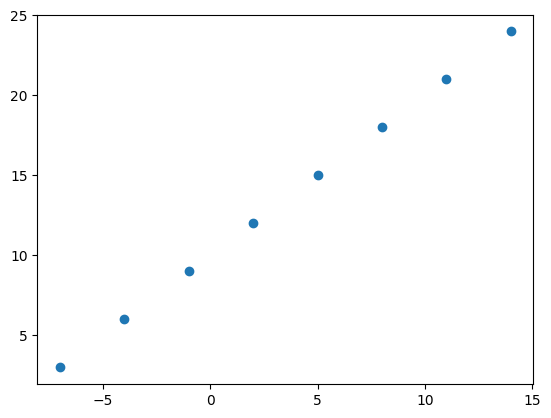

In [3]:
# Create features
X = np.array([-7., -4., -1.0,  2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "kitchen", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'kitchen', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [6]:
# Turn numpy array into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

## Steps in Modeling with Tensorflow
1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [7]:
# Set random seed
tf.random.set_seed(42)

# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 955ms/step - loss: 14.5386 - mae: 14.5386
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 14.4061 - mae: 14.4061
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 14.2736 - mae: 14.2736
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 14.1411 - mae: 14.1411
Epoch 5/5
1/1 [==============================] - 0s 26ms/step - loss: 14.0086 - mae: 14.0086


In [8]:
# predicting the value for x = 17
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 184ms/step


array([[-2.019711]], dtype=float32)

## Improving our model

We can improve our model by altering steps we took to create a model.

1. **Creating a model** - We can add more layers, also we can add more hidden units ( all called neurons) within each of the hidden layers, change the activation function of each layer
2. **Compiling a Model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer duration) or on more data

In [9]:
# Running for longer

# set the random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model
model_2.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 667ms/step - loss: 11.4314 - mae: 11.4314
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 11.2989 - mae: 11.2989
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.1664 - mae: 11.1664
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0339 - mae: 11.0339
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 10.9014 - mae: 10.9014
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.7689 - mae: 10.7689
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 10.6364 - mae: 10.6364
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 10.5039 - mae: 10.5039
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 10.3714 - mae: 10.3714
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2389 - mae: 10.2389
Epoch 11/100
1/1 [==============================

In [10]:
y_pred = model_2.predict([17.0])
y_pred

1/1 [==============================] - 0s 206ms/step


array([[29.91759]], dtype=float32)

In [11]:
# lets add layers to the model

# set the random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model
model_3.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 755ms/step - loss: 11.9652 - mae: 11.9652
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 11.3888 - mae: 11.3888
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8267 - mae: 10.8267
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2384 - mae: 10.2384
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 9.6372 - mae: 9.6372
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0100 - mae: 9.0100
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 8.3514 - mae: 8.3514
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 7.6587 - mae: 7.6587
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 6.9139 - mae: 6.9139
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 6.1098 - mae: 6.1098
Epoch 11/100
1/1 [==============================] - 0s 20ms/

In [12]:
y_pred = model_3.predict([17.0])
y_pred

1/1 [==============================] - 0s 137ms/step


array([[31.611479]], dtype=float32)

It might be overfitting

In [13]:
# change the optimizer to adam

# create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# fit the model
model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.1180 - mae: 14.1180
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 13.2234 - mae: 13.2234
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 12.3295 - mae: 12.3295
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.4371 - mae: 11.4371
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 10.5843 - mae: 10.5843
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 9.9182 - mae: 9.9182
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 9.2506 - mae: 9.2506
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 8.5777 - mae: 8.5777
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 7.8861 - mae: 7.8861
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 7.1698 - mae: 7.1698
Epoch 11/100
1/1 [==============================] - 0s 17ms/s

In [14]:
y_pred = model_4.predict([17.0])
y_pred

1/1 [==============================] - 0s 334ms/step


array([[27.066492]], dtype=float32)

## Evaluating a Model
In practice a typical workflow you will go through when building neural networks is:

> ``` Build a model --> Fit it --> evaluate it --> tweak a model --> fit it --> evaluate it --> tweak a model```

It's a good idea to visualize:
* data - what data are we working with? What does it look like?
* The model - what does our model look like?
* The training of a model - how does a model perform while it learns ?
* The prediction of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [15]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

## Visualize the data

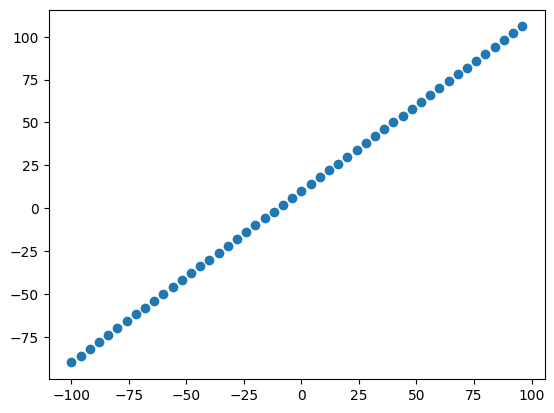

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X, y);

## The 3 sets
* Training set - The model learns from this data, which is typically 70-80% of the total data you have available
* The Validation set - The model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [18]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing the data

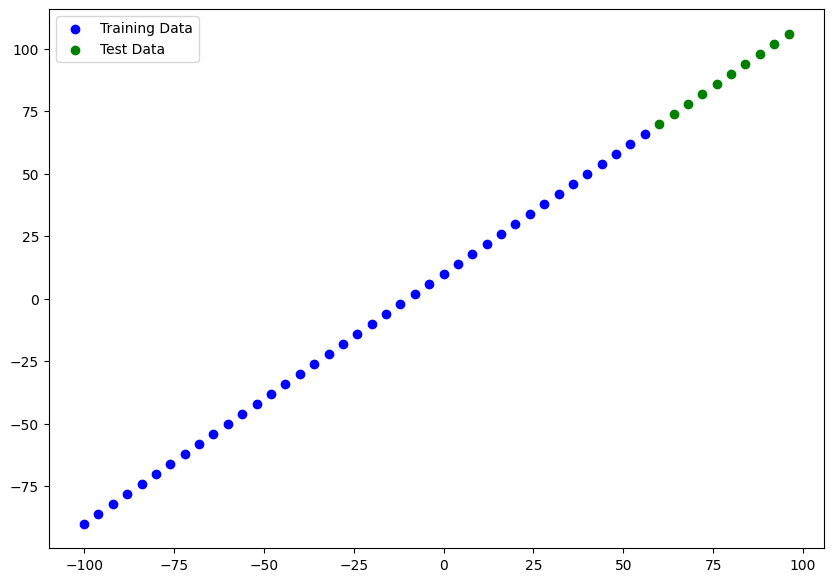

In [19]:
# Figure size
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")

# Show a legend
plt.legend();

### Build model with input shape to have summary

In [20]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params: Total number of parameters in the model.
* Trainable params: These are the parameters (patterns) the model can update as it trains
* Non-trainable params: These parameters aren't updated during training ( this is typical when you bring in already learn parameters or parameters from other models during **transfer learning**)


In [22]:
model.fit(X_train, y_train, epochs=100, verbose=0)

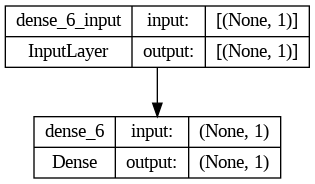

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Visualizing our model's predictions

To visualize predictions, its good idea to plot them against the ground truth labels.



In [24]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred, y_pred.shape, y_test.shape

1/1 [==============================] - 0s 87ms/step


(array([[53.249218],
        [56.774494],
        [60.29977 ],
        [63.82505 ],
        [67.350334],
        [70.87561 ],
        [74.40089 ],
        [77.92616 ],
        [81.45144 ],
        [84.976715]], dtype=float32),
 (10, 1),
 TensorShape([10]))

- You can notice that y_pred has an extra dimension. We will have to squeeze the tensor to remove shape with 1 to plot data

In [25]:
# Let's create a plotting function
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred
):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test Data")

  # plot model's predictions in red
  plt.scatter(test_labels, predictions, c="r", label="Model Predictions")

  # show legend
  plt.legend();

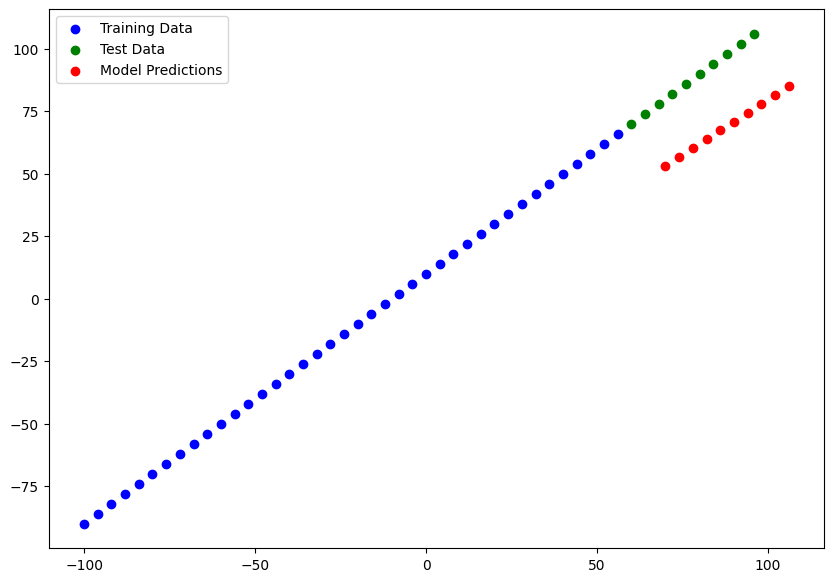

In [26]:
plot_predictions()

## Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE: Mean Absolute Error - on average how wrong is each of model's predictions
* MSE: mean square error, square the average errors

In [27]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 152ms/step - loss: 18.8870 - mae: 18.8870


[18.88702964782715, 18.88702964782715]

In [28]:
# Calcuate the mean absolute error
mae = tf.metrics.mean_absolute_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred))

In [29]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.88703>

In [30]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=358.5792>

In [31]:
def mae(y_true=y_test, y_pred=y_pred):
  return tf.metrics.mean_absolute_error(
      y_true,
      tf.squeeze(y_pred)
  )

def mse(y_true=y_test, y_pred=y_pred):
  return tf.metrics.mean_squared_error(
      y_true,
      tf.squeeze(y_pred)
  )

## Modelling experiments

1. 1 layer, trained for 100 epochs
2. 2 layers, trained for 100 epochs
3. 2 layers, trained for 500 epochs

### Build Model 1

In [32]:
# set random seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# fit the model
model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100, verbose=0)

In [33]:
# predicting values
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 89ms/step


array([[56.40228 ],
       [60.024544],
       [63.64681 ],
       [67.26907 ],
       [70.891335],
       [74.5136  ],
       [78.135864],
       [81.758125],
       [85.38039 ],
       [89.002655]], dtype=float32)

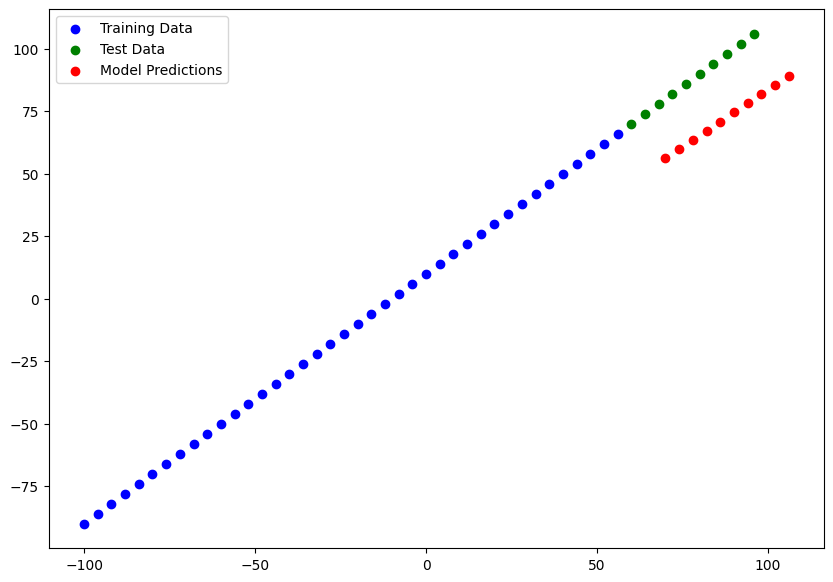

In [34]:
# plot predictions
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_1
)

In [35]:
# mae and mse
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=15.297533>,
 <tf.Tensor: shape=(), dtype=float32, numpy=235.19165>)

### Build model 2

2 layers with 100 epochs and mse

In [36]:
# set random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mse"])

# fit the model
model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 63ms/step


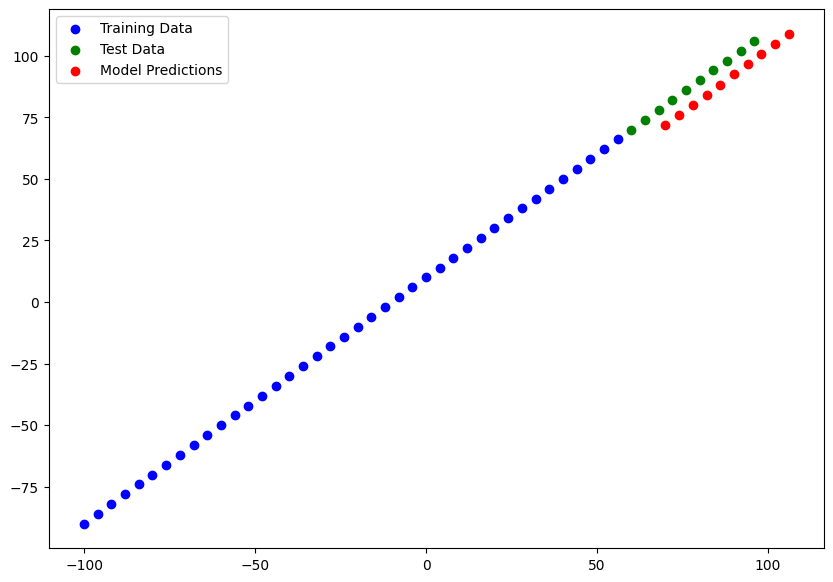

In [37]:
# predict
y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions=y_pred_2)

In [38]:
# mae and mse
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.3352845>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.5805025>)

### Build model 3
2 layers with 500 epochs

In [39]:
# set random seed
tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mse"])

# fit the model
model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 62ms/step


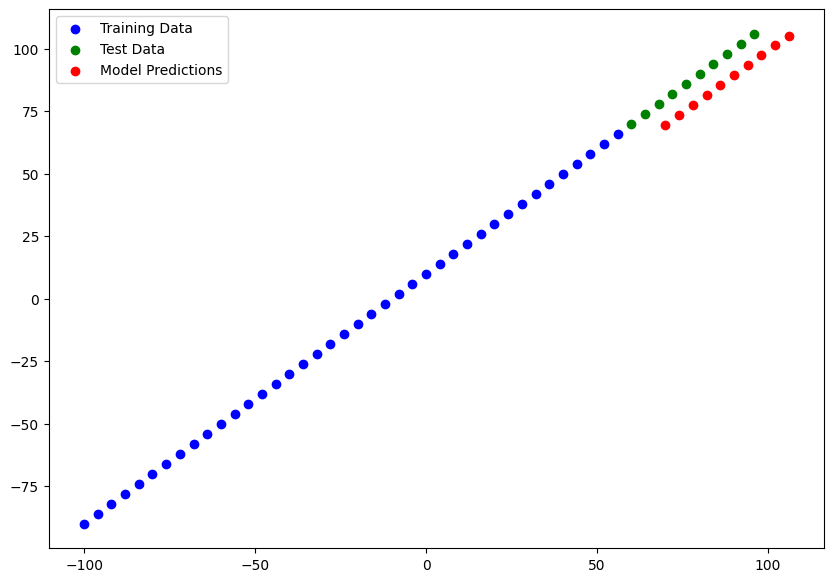

In [40]:
y_pred_3 = model_3.predict(X_test)

plot_predictions(predictions=y_pred_3)

In [41]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.5838486>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.34731692>)

## Comparing and tracking your modelling experiments

In [42]:
import pandas as pd

model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=["Model Name", "MAE", "MSE"])

all_results


,Model Name,MAE,MSE
0,model_1,15.297533,235.191650
1,model_2,2.335284,5.580503
2,model_3,0.583849,0.347317


In [43]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


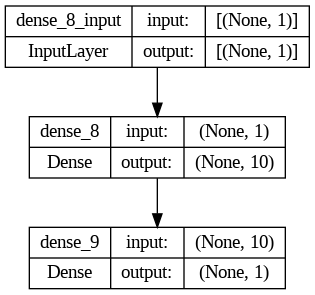

In [44]:
plot_model(model_2, show_shapes=True)

## Saving our models

Saving our model allows us to use this model outside of google colab

There are two formats to save
- `SavedModelFormat`
- `HDF5`

In [45]:
# Save model using SavedModelFormat
model_2.save("best_regression_savedFormat")

In [46]:
# Save model in hdf5 standard
model_2.save("best_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load saved model


In [47]:
loaded_model = tf.keras.models.load_model("/content/best_model.h5")

loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Download a model from Google Colab

1. You can go to the files tab and click download
2. Using code
3. Save it to google drive

In [48]:
# Download file
from google.colab import files
files.download('/content/best_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# Save a file from Google colab to google drive
!cp /content/best_model.h5 /content/drive/MyDrive/tensorflow

In [50]:
!ls /content/drive/MyDrive/tensorflow

best_model.h5


## Apply all the knowledge that we got to a larger example

In [51]:
# importing the libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [52]:
# Read the file
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [53]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [54]:
# Create x and y dataset
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [55]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [56]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [57]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Build the model

# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# fit the model
insurance_model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100, verbose=0)

In [59]:
# Evaluate the model
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8595.2549 - mae: 8595.2549


[8595.2548828125, 8595.2548828125]

In [60]:
y_train.mean(), y_train.median()

(13346.089736364485, 9575.4421)

## Try to improve the model
1. Add an extra layer with more hidden units
2. Train for longer

In [61]:
tf.random.set_seed(42)

# Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# fit the model
insurance_model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs=100, verbose=0)

In [62]:
# evaluate
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8628.0215 - mae: 8628.0215


[8628.021484375, 8628.021484375]

In [63]:
tf.random.set_seed(42)

# Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# fit the model
history = insurance_model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs=200, verbose=0)

In [64]:
# evaluate
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8632.1133 - mae: 8632.1133


[8632.11328125, 8632.11328125]

Text(0, 0.5, 'loss')

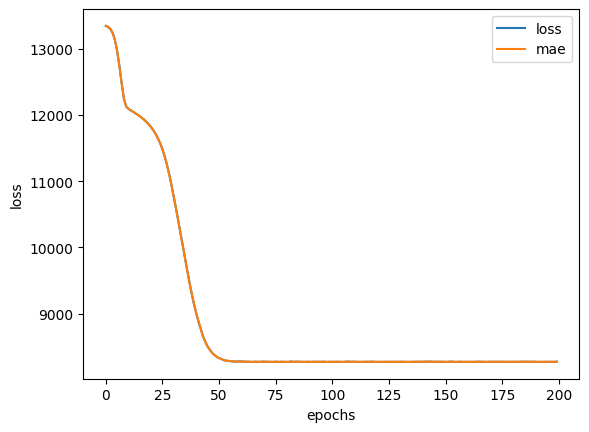

In [65]:
# plot loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

### How long should you train for?
Solution is to apply EarlyStopping callback

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tends to prefer normalization

In [66]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [67]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)


# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Ask ct to learn the patterns on X train data
ct.fit(X_train)

# based on the patterns learnt, transform the data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [68]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [69]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

### Now our model is normalized and one hot encoded. Let's the build the model on it

In [70]:
tf.random.set_seed(42)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# fit the model
insurance_model_4.fit(tf.expand_dims(X_train_normal, -1), y_train, epochs=100, verbose=0)

In [71]:
# evaluate
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8621.9268 - mae: 8621.9268


[8621.9267578125, 8621.9267578125]